In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
import preprocessing

importing Jupyter notebook from preprocessing.ipynb


In [2]:
X_data=preprocessing.X_data_scaler
Y_data=preprocessing.Y_data

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_data, Y_data)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [5]:
rf= RandomForestClassifier(n_estimators = 100, 
                                max_depth = 10,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)

In [6]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [7]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_data,Y_data, test_size=0.1, random_state=777, stratify=Y_data)

In [8]:
Y_train_val = Y_train_val.to_numpy ()

In [9]:
skf = StratifiedKFold(n_splits=10)
k=10

In [10]:
result_Y_val=[]
result_Y_val_pred=[]
model =  rf

i=0
for train_index,val_index in skf.split(X_train_val,Y_train_val):
    i=i+1
    print(str(i),"번째 cross validation")
    X_train = X_train_val[train_index]
    Y_train = Y_train_val[train_index]  
    X_val = X_train_val[val_index]
    Y_val = Y_train_val[val_index]
    
    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_sample(X_train, Y_train)
    model.fit(X_train_oversampled, Y_train_oversampled)

    Y_val_pred = rf.predict(X_val)
    result_Y_val.append(Y_val)
    result_Y_val_pred.append(Y_val_pred)



1 번째 cross validation
2 번째 cross validation
3 번째 cross validation
4 번째 cross validation
5 번째 cross validation
6 번째 cross validation
7 번째 cross validation
8 번째 cross validation
9 번째 cross validation
10 번째 cross validation


In [11]:
Y_pred=model.predict(X_test)

In [12]:
def evaluation(Y_test,y_pred):
    acc= accuracy_score(Y_test,y_pred)
    print("accuracy : {}".format(acc))
    prec= precision_score(Y_test,y_pred)
    print("precision : {}".format(prec))
    rec= recall_score(Y_test,y_pred)
    print("recall: {}".format(rec))
    f1= f1_score(Y_test,y_pred)
    print("F1-Score : {}".format(f1))
    auc_score=roc_auc_score(Y_test,y_pred)
    print("auc_score: {}".format(auc_score))
    

In [13]:
for i in range(k):
    print("{} 번째 cross validation".format(i+1))
    evaluation(result_Y_val[i],result_Y_val_pred[i])
    print("\n")

1 번째 cross validation
accuracy : 0.999056519004403
precision : 0.6923076923076923
recall: 0.8780487804878049
F1-Score : 0.7741935483870966
auc_score: 0.9386643056240167


2 번째 cross validation
accuracy : 0.9986970391337556
precision : 0.6
recall: 0.825
F1-Score : 0.6947368421052632
auc_score: 0.9120048836476573


3 번째 cross validation
accuracy : 0.998562250078627
precision : 0.5740740740740741
recall: 0.775
F1-Score : 0.6595744680851063
auc_score: 0.8869823783589144


4 번째 cross validation
accuracy : 0.9987419688187986
precision : 0.6111111111111112
recall: 0.825
F1-Score : 0.7021276595744681
auc_score: 0.9120273889364


5 번째 cross validation
accuracy : 0.9985173203935841
precision : 0.5507246376811594
recall: 0.95
F1-Score : 0.6972477064220184
auc_score: 0.9743023360489714


6 번째 cross validation
accuracy : 0.9986521094487127
precision : 0.5833333333333334
recall: 0.875
F1-Score : 0.7000000000000001
auc_score: 0.9369373677814286


7 번째 cross validation
accuracy : 0.9988318281888844
pr

In [14]:
evaluation(Y_test,Y_pred)

accuracy : 0.9989486878816061
precision : 0.6862745098039216
recall: 0.7777777777777778
F1-Score : 0.7291666666666667
auc_score: 0.8885648185656286


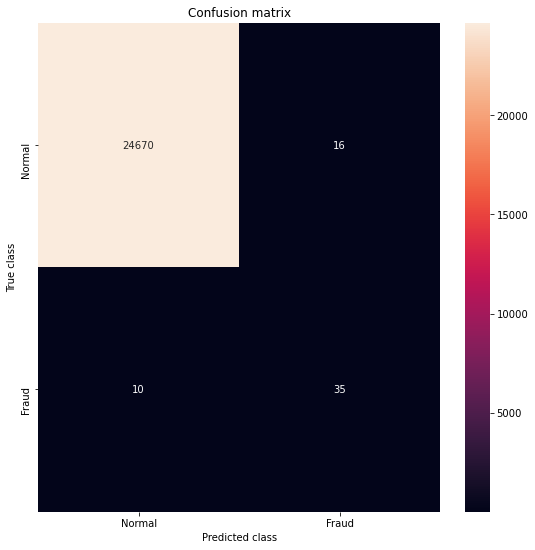

In [15]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
